In [25]:
from sklearn import metrics
import numpy as np
import pandas as pd
import pickle
import re
import mymodule
import matplotlib.pyplot as plt
from itertools import cycle

In [7]:
with open('model/lda_model.pkl', 'rb') as f:
  lda_model = pickle.load(f) #import lda model
  
data = pd.read_csv('dataset/DatasetLegal.csv') #read data
question_data = data['question']
train_question_data = question_data[:6031]
test_question_data = question_data[6031:]

with open('model/topic_dict.pkl', 'rb') as f:
  topic_dict = pickle.load(f)

with open('model/question_lda.pkl', 'rb') as f:
   question_lda = pickle.load(f)

In [8]:
str_answer = train_question_data.astype(str)
str_answer = str_answer.map(lambda x: re.sub('[,\.!?#]', '', x))
corpus = [mymodule.preprocess(text) for text in str_answer]
pred_score = [lda_model[text] for text in corpus]

In [9]:
pred_score

[[(0, 0.18300617),
  (1, 0.019109374),
  (2, 0.03752719),
  (3, 0.17937241),
  (4, 0.5405989),
  (5, 0.04038586)],
 [(0, 0.34666866),
  (1, 0.019856988),
  (2, 0.029348552),
  (3, 0.02612897),
  (4, 0.32876202),
  (5, 0.24923484)],
 [(0, 0.03740252),
  (1, 0.025391083),
  (2, 0.014225405),
  (3, 0.7896399),
  (4, 0.030124849),
  (5, 0.10321621)],
 [(0, 0.07635657),
  (1, 0.03377036),
  (2, 0.02456517),
  (3, 0.027054168),
  (4, 0.07700802),
  (5, 0.76124567)],
 [(0, 0.24065487),
  (1, 0.091193706),
  (2, 0.15442757),
  (3, 0.45099753),
  (4, 0.023028411),
  (5, 0.03969792)],
 [(0, 0.21515663),
  (1, 0.6474567),
  (2, 0.03199103),
  (3, 0.037479144),
  (4, 0.03193392),
  (5, 0.03598256)],
 [(0, 0.0826378),
  (1, 0.0883615),
  (2, 0.031234138),
  (3, 0.7481146),
  (4, 0.025581509),
  (5, 0.024070438)],
 [(0, 0.24495296),
  (1, 0.26122692),
  (2, 0.06703262),
  (3, 0.16157836),
  (4, 0.030690148),
  (5, 0.23451896)],
 [(0, 0.019723088),
  (1, 0.013064746),
  (2, 0.036935654),
  (3, 0.0109

In [10]:
# for each_doc in pred_score:
#     i = 0
#     for each_topic in each_doc:
#         if(each_topic[0] == i): i+=1
#         else: 
#             each_doc.insert(i, (i, 0))
#             i+=1
# จะติดว่า ถ้าตัวสุดท้ายหายไป มันจะไม่สน เช่น index 5 หาย
# แต่ถ้าเราสร้าง if เช็คแค่ index สุดท้าย ก็จะมีปัญหาเรื่อง ถ้าหาย index 4 5 หรือว่ามากกว่า T^T

In [11]:
# for each_doc in pred_score:
#     for i in range(6):
#         if(each_doc[i][0] != i): each_doc.insert(i, (i, 0))
# list index out of range 

In [12]:
for each_doc in pred_score:
    i = 0
    for each_topic in each_doc:
        if(each_topic[0] == i): i+=1
        else: 
            each_doc.insert(i, (i, 0))
            i+=1
    while(i < 6):
        each_doc.append((i, 0))
        i+=1

In [13]:
pred_score[6029:]

[[(0, 0.87587744),
  (1, 0.01516433),
  (2, 0.06692387),
  (3, 0.013891995),
  (4, 0.011075781),
  (5, 0.017066589)],
 [(0, 0.036949813), (1, 0.017776368), (2, 0), (3, 0.9253824), (4, 0), (5, 0)]]

In [14]:
y_predict=[]
for each_topic in pred_score:
  temp_pred = []
  for topic in each_topic:
    if(topic[1]>0.167): temp_pred.append(1)
    else: temp_pred.append(0)
  y_predict.append(temp_pred)
# y_predict = np.array(y_predict)
y_predict

[[1, 0, 0, 1, 1, 0],
 [1, 0, 0, 0, 1, 1],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 1, 0, 0],
 [1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [1, 1, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0],
 [0, 0, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 1],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 1, 0],
 [1, 0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 0],
 [0, 1, 1, 0, 0, 0],
 [1, 1, 1, 0, 0, 0],
 [0, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 0],
 [1, 1, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 1, 0],
 [1, 1, 0, 1,

In [15]:
for each_doc in y_predict:
    each_doc.pop(0)
y_predict

[[0, 0, 1, 1, 0],
 [0, 0, 0, 1, 1],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [0, 1, 0, 1, 0],
 [1, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 1],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 1, 0, 1],
 [0, 1, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 1, 0, 1],
 [0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0],
 [0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 1],
 [1, 0, 0, 0, 1],
 [0, 1, 1, 0, 0],
 [0, 0, 1,

In [16]:
test = data['Classes']
test = test[:6031]
y_test = []
topics_of_interest = ['Violation', 'family', 'criminal', 'contract', 'labor']
for sample in test:
    temp_test = []
    # Loop over each topic of interest
    for topic in topics_of_interest:
        if topic in sample:
            temp_test.append(1)
        else:
            temp_test.append(0)
    y_test.append(temp_test)

In [17]:
print(len(y_test))
y_test


6031


[[0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0,

In [18]:
y_true = y_test
y_pred = y_predict

In [19]:
metrics.accuracy_score(y_true, y_pred)

0.011938318686784945

In [20]:
metrics.multilabel_confusion_matrix(y_true, y_pred)

array([[[4655, 1059],
        [ 243,   74]],

       [[3213,  998],
        [1797,   23]],

       [[2468, 2696],
        [ 763,  104]],

       [[3384,  444],
        [2125,   78]],

       [[3664, 1543],
        [ 816,    8]]], dtype=int64)

In [21]:
label_names = ['violation', 'family', 'criminal', 'contract', 'labor']
print(metrics.classification_report(y_true, y_pred,target_names=label_names))

              precision    recall  f1-score   support

   violation       0.07      0.23      0.10       317
      family       0.02      0.01      0.02      1820
    criminal       0.04      0.12      0.06       867
    contract       0.15      0.04      0.06      2203
       labor       0.01      0.01      0.01       824

   micro avg       0.04      0.05      0.04      6031
   macro avg       0.06      0.08      0.05      6031
weighted avg       0.07      0.05      0.04      6031
 samples avg       0.03      0.05      0.03      6031



c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


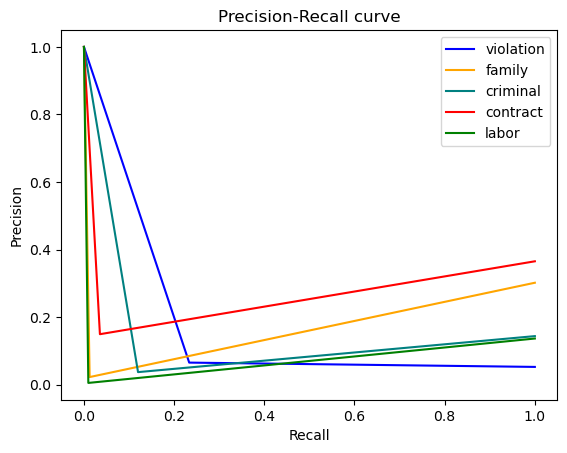

In [35]:
# y_true is the true label values for your test data
# y_pred is the predicted probability values for each class for your test data
# You can obtain y_pred from the output of your classifier's `predict_proba` method
# For example, if your classifier is named `clf`, you can get y_pred like this:
# y_pred = clf.predict_proba(X_test) 
y_true = np.array(y_test)
y_pred = np.array(y_predict)
# Compute the precision and recall values for each class
precision = dict()
recall = dict()
n_classes = y_true.shape[1]
for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_true[:, i], y_pred[:, i])

# Plot the precision-recall curve for each class
label = ['violation', 'family', 'criminal', 'contract', 'labor']

colors = cycle(['blue', 'orange', 'teal', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color,
             label=label[i])
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.title('Precision-Recall curve')
plt.show()


In [ ]:
from sklearn.preprocessing import label_binarize

# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=[0, 1, 2])
n_classes = Y.shape[1]


# We use OneVsRestClassifier for multi-label prediction
from sklearn.multiclass import OneVsRestClassifier

# Run classifier
classifier = OneVsRestClassifier(svm.LinearSVC(random_state=random_state))
classifier.fit(X_train, Y_train)
y_score = classifier.decision_function(X_test)
y_predict =  classifier.predict(X_test)


In [34]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
y_pred = np.array(y_pred)
y_test = np.array(y_test)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_test, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.19
